# Import Packages

In [1]:
import os
os.environ['XDG_CACHE_HOME'] = 'home/msds2022/mpingol/ .cache'

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [3]:
df = pd.ExcelFile('research_profile_updated.xlsx').parse('research_profile')

# EDA

Ratio of budget to research count per university

In [6]:
univ = df[['University (Abbreviation)', 'Allocated Budget (PH Pesos) 1,000,000.00']]
univ.columns = ['University', 'Budget']
univ_counts = pd.DataFrame(univ.groupby('University')['University'].agg('count'))
univ_counts = univ_counts.rename({'University':'Research Count'}, axis=1)

univ_budget = pd.DataFrame(univ.groupby('University')['Budget'].agg('sum'))
univ_budget = univ_budget.rename({'Budget':'Total Budget'}, axis=1)

univ_final = univ_counts.join(univ_budget)
univ_final['Ratio'] = univ_final['Total Budget']/univ_final['Research Count']
univ_final['Ratio'] = univ_final['Ratio'].apply(lambda x: round(x))

univ_final['Total Budget'] = univ_final['Total Budget'].apply(lambda x: (x/1000000))

In [7]:
univ_final

,Research Count,Total Budget,Ratio
University,,,
ADMU,1,10.000000,10000000
ASIST,269,1.083903,4029
ASSCAT,29,1.020000,35172
ASU,2,6.173585,3086792
AU,1,4.000000,4000000
...,...,...,...
USTSP,1,3.600000,3600000
WMSU,2,12.270092,6135046
WPU,1,10.000000,10000000


Ratio of budget to research count per region

In [13]:
region = df[['Region', 'Allocated Budget (PH Pesos) 1,000,000.00']]
region.columns = ['Region', 'Budget']
region_counts = pd.DataFrame(region.groupby('Region')['Region'].agg('count'))
region_counts = region_counts.rename({'Region':'Research Count'}, axis=1)

region_budget = pd.DataFrame(region.groupby('Region')['Budget'].agg('sum'))
region_budget = region_budget.rename({'Budget':'Total Budget'}, axis=1)

region_final = region_counts.join(region_budget)
region_final['Ratio'] = region_final['Total Budget']/region_final['Research Count']
region_final['Ratio'] = region_final['Ratio'].apply(lambda x: round(x))

region_final['Total Budget'] = region_final['Total Budget'].apply(lambda x: (x/1000000))

In [14]:
region_final

,Research Count,Total Budget,Ratio
Region,,,
1,4,12.537197,3134299
2,17,20.515000,1206765
3,177,81.864621,462512
5,2,14.000000,7000000
6,11,29.999040,2727186
7,5,14.817873,2963575
8,10,16.886364,1688636
9,4,13.733496,3433374
10,2,13.600000,6800000


Scatter plot for ratios

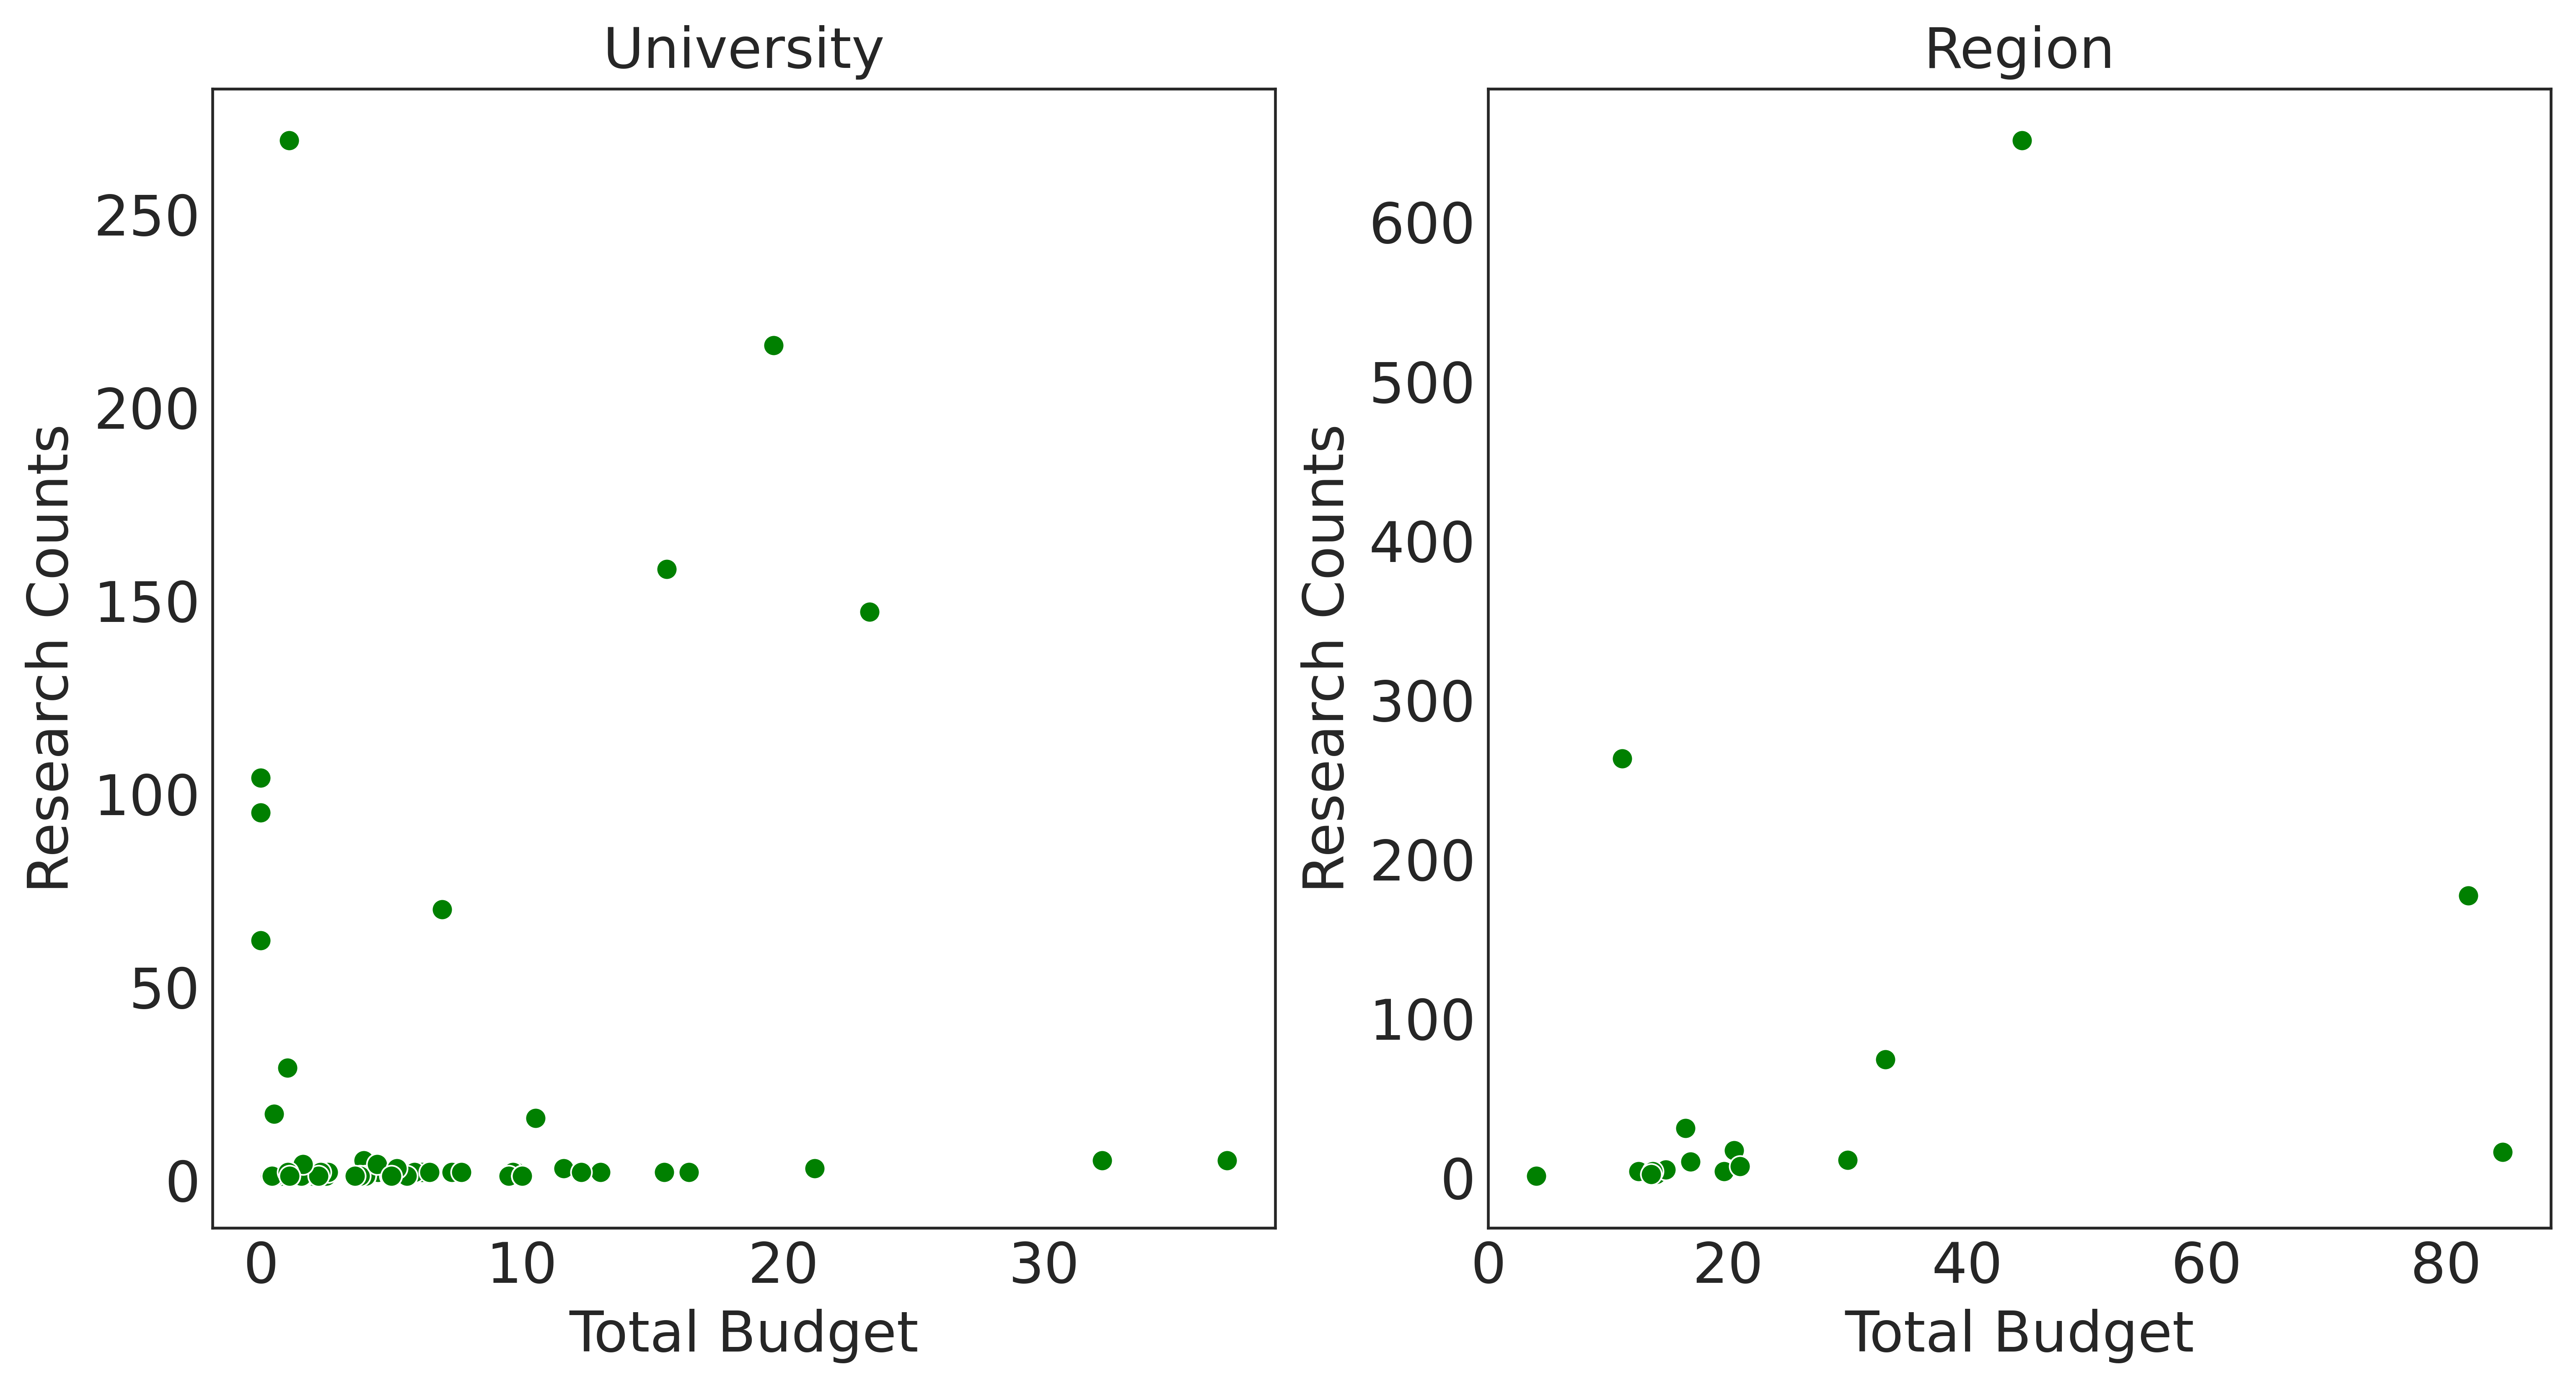

In [18]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6), dpi=600)
sns.scatterplot(x=univ_final['Total Budget'], y=univ_final['Research Count'], ax=ax1, color='green')
sns.scatterplot(x=region_final['Total Budget'], y=region_final['Research Count'],ax=ax2, color='green')
ax1.tick_params(axis='both', which='both', length=0)
ax2.tick_params(axis='both', which='both', length=0)
ax1.set_title('University', fontsize=16)
ax2.set_title('Region', fontsize=16)
ax1.set_xlabel('Total Budget', fontsize=16)
ax1.set_ylabel('Research Counts', fontsize=16)
ax2.set_xlabel('Total Budget', fontsize=16)
ax2.set_ylabel('Research Counts', fontsize=16)
ax1.tick_params(labelsize=16)
ax2.tick_params(labelsize=16)
sns.set_style("white")
plt.show();

Logarithmic histogram of budget distribution

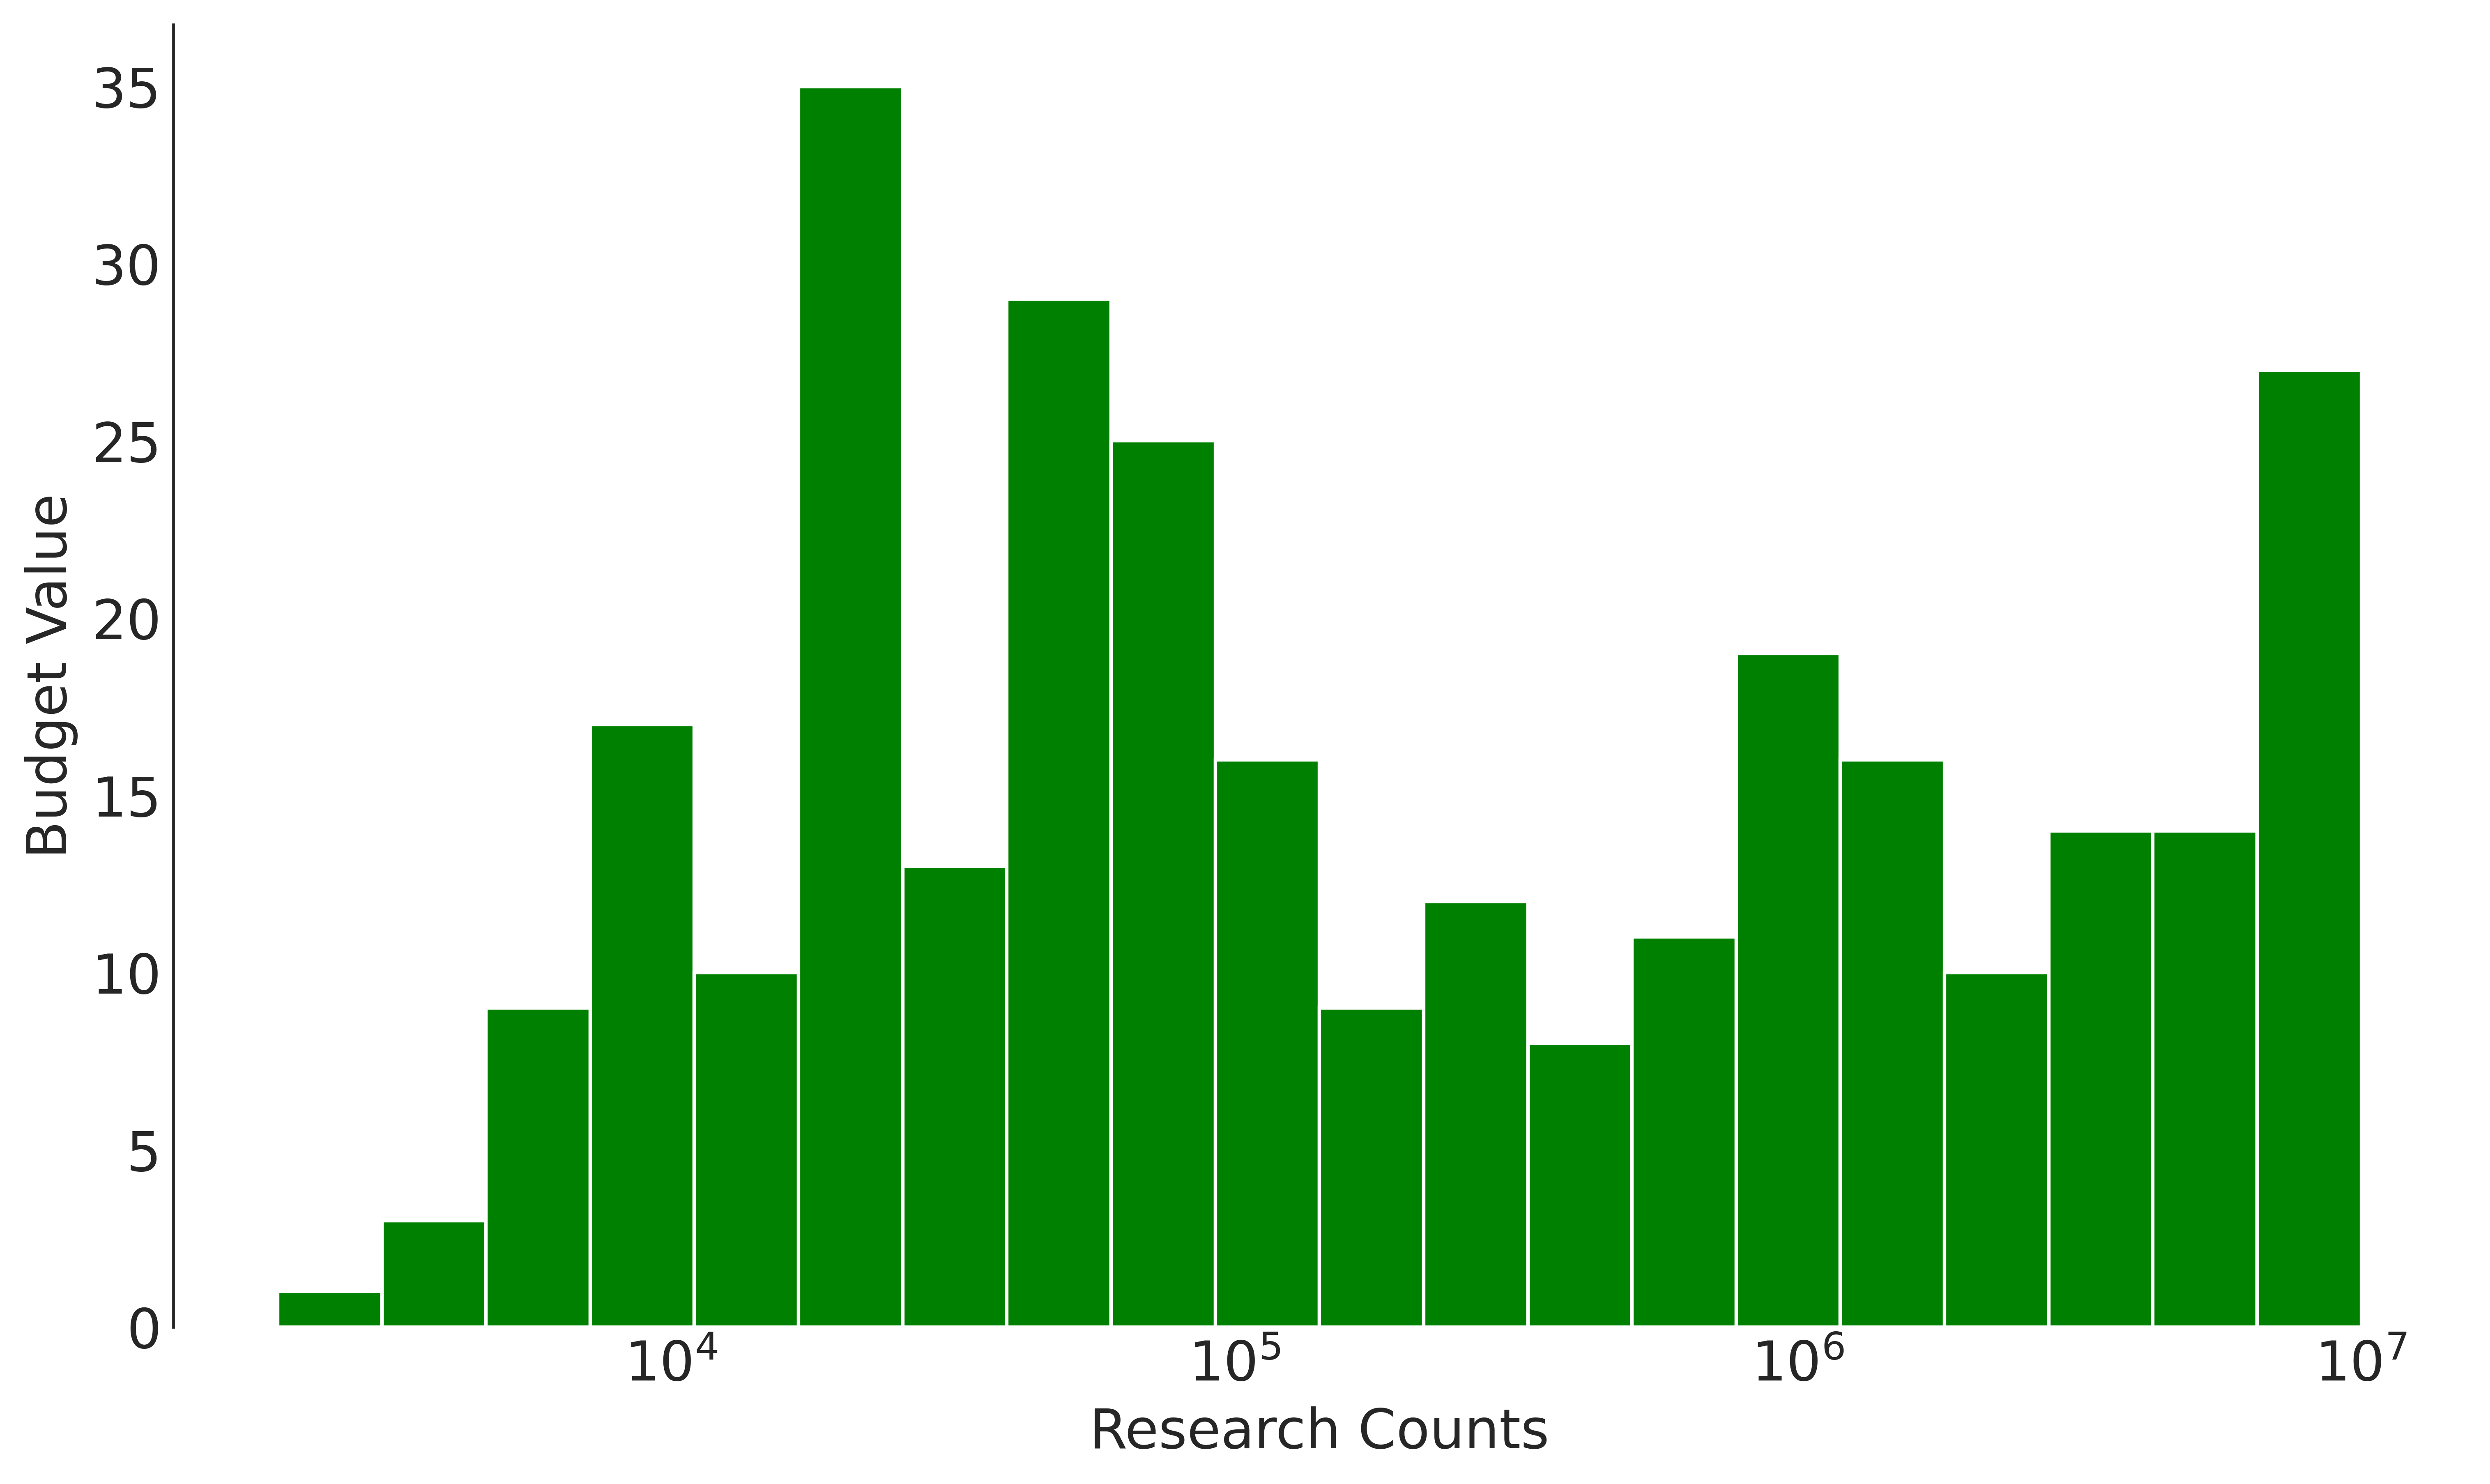

In [20]:
df_budget = df['Allocated Budget (PH Pesos) 1,000,000.00'].copy()
df_budget.columns = ['budget']
notnull_index = df_budget[df_budget.notnull()].index
zero_index = df_budget[df_budget > 0].index
df_budget = df_budget.loc[notnull_index.intersection(zero_index)]
bins = 20
hist, bins = np.histogram(df_budget, bins=bins);
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins));
plt.figure(figsize=(12,7), dpi=600);
plt.hist(df_budget, bins=logbins, color='green');
plt.xscale('log');
plt.xlabel('Research Counts', fontsize=16);
plt.ylabel('Budget Value', fontsize=16);
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tick_params(axis='both', which='both', length=0);
plt.gca().spines.right.set_visible(False);
plt.gca().spines.top.set_visible(False);
plt.gca().spines.bottom.set_visible(False);